### SAMPLE USAGE
#### 1) Read XML file

We Assume that we will have a **xml file** which we can read **first initial** state of the vehicles and 
**lanelet network** of way. We directly took this **reading** from tutorial session.

In [1]:
import os
import matplotlib.pyplot as plt
from IPython import display

# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object

# generate path of the file to be opened
#file_path = "data_files/ZAM_Tutorial-1_1_T-1.xml"
#file_path = "data_files/ZAM_Tjunction-1_66_T-1.xml"
file_path = "data_files/CHN_Cho-2_1_T-1.xml"
#file_path = "data_files/DEU_A9-1_1_T-1.xml"

# read in the scenario and planning problem set
crf = CommonRoadFileReader(file_path)
scenario, planning_problem_set = crf.open()

# plot the scenario for 40 time step, here each time step corresponds to 0.1 second
for i in range(0, 40):
    # uncomment to clear previous graph
    display.clear_output(wait=True)
    
    plt.figure(figsize=(20, 10))
    # plot the scenario at different time step
    draw_object(scenario, draw_params={'time_begin': i})
    # plot the planning problem set
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()
    break


<Figure size 2000x1000 with 1 Axes>

#### 2) Create Graph

/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


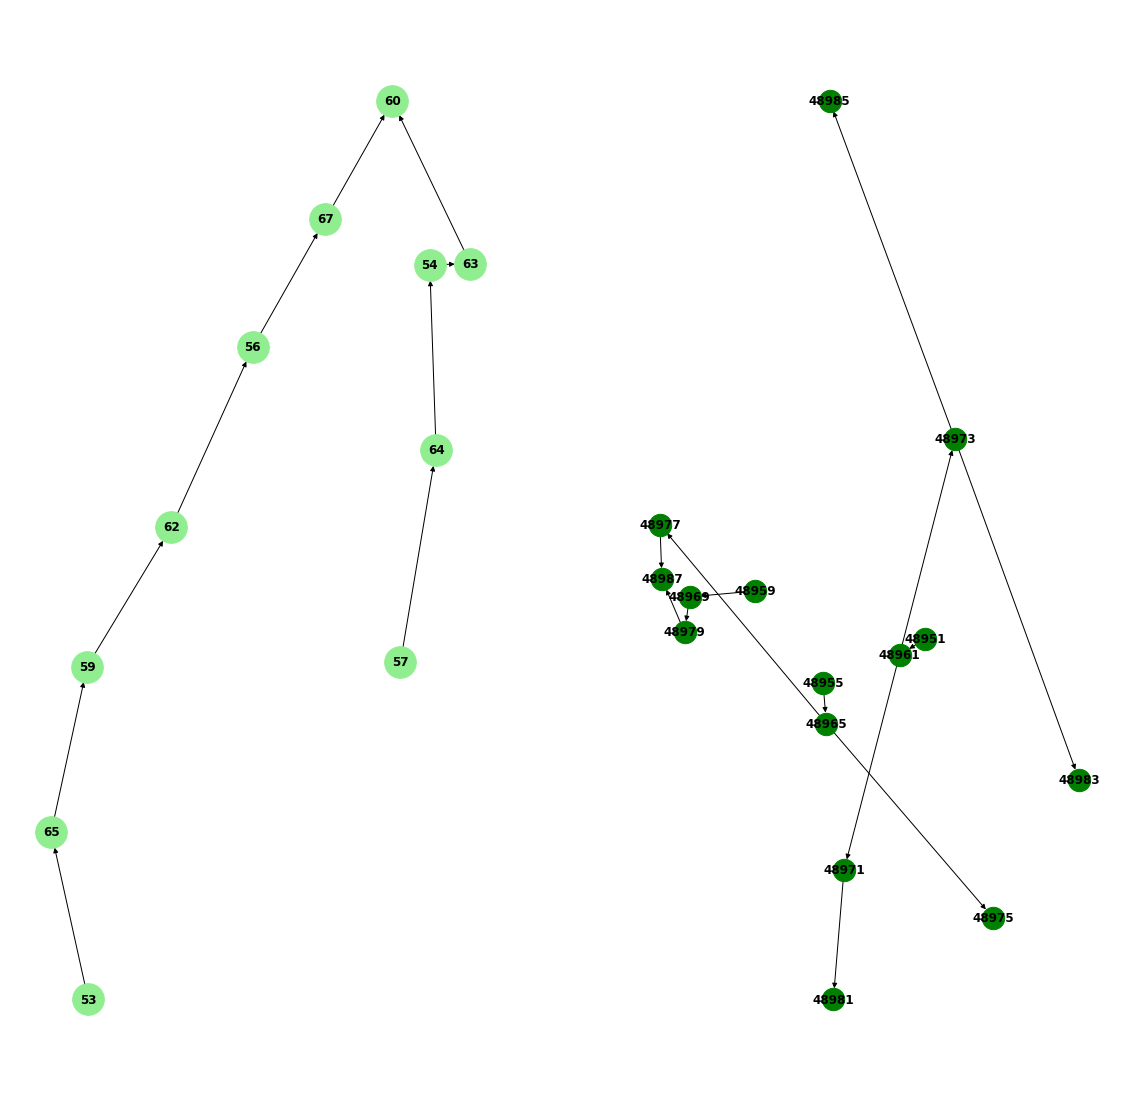

In [2]:
from GraphBasedDistanceMeasure import ScenarioGraph
from commonroad.common.file_reader import CommonRoadFileReader
import networkx as nx
import matplotlib.pyplot as plt

# generate path of the file to be opened
#file_path = "data_files/ZAM_Tutorial-1_1_T-1.xml"
#file_path2 = "data_files/ZAM_Tjunction-1_66_T-1.xml"
file_path = "data_files/CHN_Cho-2_1_T-1.xml"
file_path2 = "data_files/DEU_A9-1_1_T-1.xml"

# read in the scenario and planning problem set
crf = CommonRoadFileReader(file_path)
scenario, planning_problem_set = crf.open()

crf2 = CommonRoadFileReader(file_path2)
scenario2, planning_problem_set2 = crf2.open()

#for graph attributes
options1 = {
    'node_color': 'lightgreen',
    'node_size': 1000,
    'width': 1,
}

options2 = {
    'node_color': 'green',
    'node_size': 500,
    'width': 1,
}

plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#################################BRIEF USAGE###############################################
###########################################################################################
#############################GBDM Sample Usage ############################################
###########################################################################################
#Creata an ScenariGraph object
SG_1 = ScenarioGraph(scenario, planning_problem_set)
SG_2 = ScenarioGraph(scenario2, planning_problem_set2)
#SG_1.CreateLaneletGraph()  #you dont need to create graph. It created in constructer method

plt.subplot(1, 2, 1)
nx.draw(SG_1.scenario_graph,with_labels=True, font_weight='bold', **options1)
plt.subplot(1, 2, 2)
nx.draw(SG_2.scenario_graph,with_labels=True, font_weight='bold', **options2)
plt.show()

In [3]:
###########################################################################################
############# Sample Usage of public attributes of ScenarioGraph  #########################
###########################################################################################
######### ego vehicle ids and obstacle ids of spesified scenario(SG_1)     ################
######### dictionary structure                                             ################
######### {<id_of_vehicle_obstacle: {    "id_of_vehicle_obstacle": id,     ################
#########                                "initial_position": position,     ################
#########                                "initial_lanelet_id": lanelet  }} ################
###########################################################################################
print(SG_1.ego_vehicle_ids)
print("_________________________________________________")
print(SG_1.ego_vehicles_dic)
print("_________________________________________________")
print(SG_1.obstacle_ids)
print("_________________________________________________")
print(SG_1.obstacles_dic)

[-1]
_________________________________________________
{-1: {'id': -1, 'initial_position': [array([ 67.348 , 377.2854])], 'initial_lanelet_id': 59, 'initial_lanelet_node': 0}}
_________________________________________________
[35, 39, 311, 313, 315, 317, 318, 319, 320, 321, 322, 323, 324, 326, 327, 328, 329, 330, 331]
_________________________________________________
{35: {'id': 35, 'initial_position': array([-87.702 , 243.7694]), 'initial_lanelet_id': 67, 'initial_lanelet_node': 3}, 39: {'id': 39, 'initial_position': array([-130.5919,  198.8162]), 'initial_lanelet_id': 60, 'initial_lanelet_node': 5}, 311: {'id': 311, 'initial_position': array([-97.9548, 229.5944]), 'initial_lanelet_id': 60, 'initial_lanelet_node': 0}, 313: {'id': 313, 'initial_position': array([-22.8032, 297.0531]), 'initial_lanelet_id': 62, 'initial_lanelet_node': 0}, 315: {'id': 315, 'initial_position': array([-66.1657, 250.5458]), 'initial_lanelet_id': 63, 'initial_lanelet_node': 2}, 317: {'id': 317, 'initial_posit

In [8]:
cars = { **SG_1.ego_vehicles_dic, **SG_1.obstacles_dic}
car_ids = SG_1.obstacle_ids + SG_1.ego_vehicle_ids

for car_id in car_ids:
    Vehicle(vehicle_obstacle_dict)??